# Summary

This notebook analyzes historical WRF model output for the Pacific Northwest, focusing on near-surface temperature (T2) patterns associated with different wind directions. The workflow includes:

- Importing and preprocessing WRF model data for the region of interest.
- Categorizing temperature data by wind direction quadrants (NE, SE, SW, NW).
- Calculating and visualizing the difference in T2 for each wind quadrant relative to the overall mean.
- Generating spatial plots to illustrate the impact of wind direction on temperature distribution.

Key variables include:
- `ds_hist`: xarray Dataset containing historical WRF data.
- `T2quad_hist`: xarray Dataset with T2 statistics by wind quadrant.
- `lats`, `lons`: Latitude and longitude grids for plotting.
- `wind_dir_labels`: List of wind direction quadrant labels.
- `min`, `max`: Plotting limits for temperature differences.

The notebook leverages custom plotting and wind analysis utilities to facilitate regional climate diagnostics.

## Data Import and Setup

This cell imports the required Python libraries for data analysis, visualization, and custom WRF utilities. These libraries are used throughout the notebook for handling datasets, plotting, and wind analysis.


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import warnings
from WRFplot import WRFplot
import WRF_wind as Wwnd

## Model and Geographic Configuration

This cell sets the WRF model to analyze, defines the geographic bounds for the Pacific Northwest region, and specifies file paths for data input and figure output.


In [38]:

#models = ['mri-cgcm3', 'access1.0', 'access1.3', 'canesm2', 'miroc5']
model = "mri-cgcm3" # ['mri-cgcm3', 'access1.0', 'access1.3', 'canesm2', 'miroc5']

# Set geographic range from ERA5 PNW
lat1, lat2 = 40,49.5  # Southern and northern bounds
lon1, lon2 = -124.8,-116.3  # Western and eastern bounds

# file paths for importing data and saving figures
data_path = 'Data/'
figure_path = 'Graphics/'


## Load Historical WRF Data

This cell loads the historical WRF model output for the selected model and region using a custom wind utility function. The data is imported as an xarray Dataset. To keep data sizes small, this uses a single year of data for testing.


In [39]:
# Import data as xarray
print(model)
hist_path = f'{data_path}1970wrf850UVT{model}.nc'

ds_hist = Wwnd.get_wrf850UVT(hist_path, mask_range=[lon1-1,lon2+1,lat1-1,lat2+1])

mri-cgcm3


## Calculate T2 by Wind Quadrant

This cell defines wind direction quadrants and labels, then calculates the near-surface temperature (T2) statistics for each wind quadrant using a custom function. The results are stored in an xarray Dataset.


In [40]:
wind_dir_array = np.array([[0,90],[90,180],[180,270],[270,360]])
wind_dir_labels = ['NE', 'SE', 'SW', 'NW']

T2quad_hist = Wwnd.avg_from_wind(ds_hist, wind_dir_array, wind_dir_labels, WindMin=1, stat=50)

## Plot T2 Differences by Wind Quadrant

This cell prepares latitude and longitude grids, sets plotting parameters, and generates spatial plots of T2 differences for each wind quadrant relative to the overall mean. The custom `WRFplot` function is used for visualization.


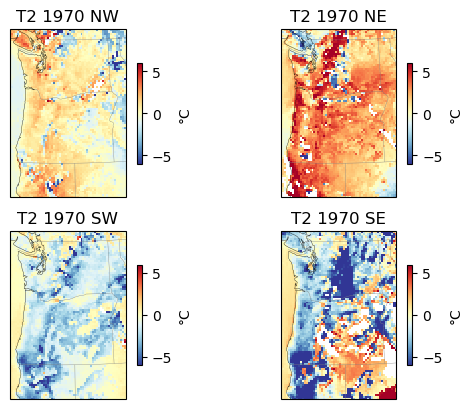

In [ ]:
lats = T2quad_hist['XLAT']
lons = T2quad_hist['XLONG']

label = 'NE'
title_suffix = '1970'

min = 0
min=-6
max=-min

subplt=[2,4,3,1] # note the order of the subplots is left-right top-bottom

for idr, label in enumerate(wind_dir_labels):
    data = T2quad_hist['T2_' + label] - T2quad_hist['T2_all']

    WRFplot(
        data,
        lats, lons,
        min,max,
        f'T2 {title_suffix} {label}', '°C', 'RdYlBu_r',
        domain='custom', map_limits=[lon1, lon2, lat1, lat2],
        smflg=0,
        subplot=[2,2,subplt[idr]]
    )


# Todo
1. Alter WRF_wind.avg_from_wind to give a count of the number of days with winds in each quadrant. Make sure counting works with and without the heat wave filter.
2. Clean up WRF_wind.avg_from_wind to make it easy to use the same routine to select different averaging or counting based on wind quadrant.